# Analysis of Fitbit Charge 2 HR for Sleep and Activity Monitoring

## Preprocessing

In [1]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sr = '1T' # 1 minute, downsampling Actiwatch from 30 s to 1 min
recording_period_min = [7, 10]
interpolate_limit = 10 # 10 minute limit

In [3]:
home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

act_files = glob.glob(data_dir + 'actiwatch/act_files/*New_Analysis.csv')
fit_files = glob.glob(data_dir + 'fitbit/*minuteStepsNarrow*.csv')

In [14]:
act = {}

In [15]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'actiwatch')

for in_file in act_files:
    
    record_id = str.split(in_file, "/")[-1][0:5]
    
    if record_id in act:
        record_id = record_id + '_repeat'

    act[record_id] = {}

    for ndays in recording_period_min:
        if in_file.endswith('.csv'):
            act[record_id][str(ndays)] = preproc.preproc(in_file, out_dir, 'actiwatch', sr, ndays, interpolate_limit, truncate=True, write=False)
            np.save(data_dir + '/actiwatch/act_preproc.npy', act)

successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 10012
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 10012
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 10014
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 10014
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording

record 20105
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 20105
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 20105
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 20108
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 20108
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 20113
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware data file
record 20113
----- saving
----- success: 0 percent NaN, 9 days 23:59:00 recording period
successfully read Actiware data file
record 20115
----- saving
----- success: 0 percent NaN, 6 days 23:59:00 recording period
successfully read Actiware da

In [4]:
fit = {}

In [ ]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'fitbit')

for in_file in fit_files:
    record_id = str.split(in_file, "/")[-1][3:8]
    print(record_id)
    
    if record_id in fit:
        record_id = record_id + '_repeat'
        
    fit[str(record_id)] = {}

    for ndays in recording_period_min:
        if in_file.endswith('.csv'):
            fit[str(record_id)][str(ndays)] = preproc.preproc(in_file, 'fitbit', sr='1T', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_limit=10, interpolate_method='linear')
            np.save(data_dir + '/fitbit/fit_preproc.npy', fit)

10011
record 10011
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 10011


----- error: less than 10 days actigraphy data - recording period is 9 days 23:34:00 
----- exclude from analysis
10011
record 10011


----- error: missing values = 13.73 percent
... error: after processing, still missing 13.73 percent data
----- exclude from analysis
record 10011


... error: after processing, still missing 9.67 percent data
----- exclude from analysis
10012
record 10012


### Plot preprocessed data

In [6]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

(array([737771., 737772., 737773., 737774., 737775., 737776., 737777.,
        737778., 737779., 737780., 737781.]),
 <a list of 11 Text major ticklabel objects>)

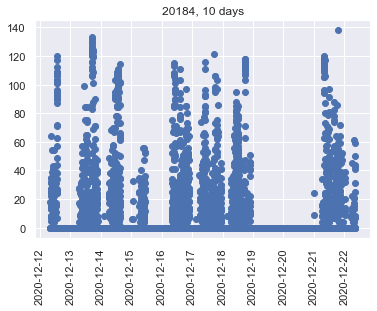

In [9]:
plt.scatter(fit['20184']['10'].index, fit['20184']['10'])
plt.title('20184' + ', 10 days')
plt.xticks(rotation=90)

In [ ]:
for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            plt.scatter(act[record_id][ndays].index, act[record_id][ndays])
            plt.title(record_id + ', ' + ndays + ' days')
            plt.savefig(data_dir + 'actiwatch/figures/' + record_id + '_' + ndays + 'd_act_preproc_scatter.png', dpi = 300)
            plt.clf()
        except Exception as e:
            print(e)

In [11]:
for record_id in fit.keys():
    for ndays in fit[record_id].keys():
        try:
            plt.scatter(fit[record_id][ndays].index, fit[record_id][ndays])
            plt.title(record_id + ', ' + ndays + ' days')
            plt.savefig(data_dir + 'fitbit/figures/' + record_id + '_' + ndays + 'd_fit_preproc_scatter.png', dpi = 300)
            plt.clf()
        except Exception as e:
            print(e)

<Figure size 432x288 with 0 Axes>

### Find Fitbit watch off periods using HR data

In [46]:
record_id = '10023_repeat'

In [79]:
hrFile = glob.glob(data_dir + 'fitbit/*%s*heartrate_1min.csv' % record_id[0:5])[0] #if repeat, do 'fitbit/*%s*heartrate_1min.csv'
hrFile

'/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_heartrate_1min.csv'

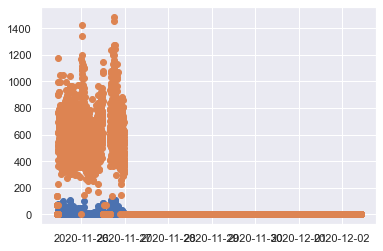

In [156]:
plt.scatter(df.index, df.Activity)
plt.scatter(df.index, df.Value)

In [304]:
missing = pd.DataFrame([])

record_id = '20184'
print(record_id)

if 'repeat' in record_id:
    hrFile = glob.glob(data_dir + 'fitbit/*%s*heartrate_1min_beiwe.csv' % record_id[0:5])[0]
    print(hrFile)
else:
    try:
        hrFile = glob.glob(data_dir + 'fitbit/WA_' + record_id[0:5] + '*heartrate_1min_' + ('[0-9]' * 3) + '*.csv')[0]

    except: 
        hrFile = glob.glob(data_dir + 'fitbit/*%s*heartrate_1min_beiwe.csv' % record_id[0:5])[0]
    print(hrFile)

try:
    df = []
    missingValue = 0
    hr = pd.read_csv(hrFile, index_col = 'Time', parse_dates = True)
    steps = pd.DataFrame(fit[str(record_id)]['7'])

    df = pd.merge(steps, hr, left_on = 'Time', right_on = 'Time', left_index=True)
    
except Exception as e:
    print(e)

print(df)

20184
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_20184_heartrate_1min_beiwe.csv
                     Activity  Value
Time                                
2020-12-12 08:19:00       0.0  217.0
2020-12-12 08:20:00       0.0  294.0
2020-12-12 08:21:00       0.0  437.0
2020-12-12 08:22:00      18.0  609.0
2020-12-12 08:23:00       0.0  638.0
...                       ...    ...
2020-12-19 08:14:00       0.0    0.0
2020-12-19 08:15:00       0.0    0.0
2020-12-19 08:16:00       0.0    0.0
2020-12-19 08:17:00       0.0    0.0
2020-12-19 08:18:00       0.0    0.0

[10080 rows x 2 columns]


In [24]:
missing = pd.DataFrame([])

for record_id in fit.keys():
    print(record_id)
    
    if 'repeat' in record_id:
        hrFile = glob.glob(data_dir + 'fitbit/*%s*heartrate_1min_beiwe.csv' % record_id[0:5])[0]
        print(hrFile)
    else:
        try:
            hrFile = glob.glob(data_dir + 'fitbit/WA_' + record_id[0:5] + '*heartrate_1min_' + ('[0-9]' * 3) + '*.csv')[0]

        except: 
            hrFile = glob.glob(data_dir + 'fitbit/*%s*heartrate_1min_beiwe.csv' % record_id[0:5])[0]
        print(hrFile)

    try:
        df = []
        missingValue = 0
        hr = pd.read_csv(hrFile, index_col = 'Time', parse_dates = True)
        steps = pd.DataFrame(fit[record_id]['7'])

        df = pd.merge(steps, hr, left_on = 'Time', right_on = 'Time', left_index=True)

        if (df.Value == 0).sum()/len(df) > 0:
            missingValue = float((df.Value == 0).sum()/len(df))
            
        elif df.Value.isnull().sum()/len(df) > 0:
            missingValue = float(df.Value.isnull().sum()/len(df))
        
        else: 
            missingValue = 0

        if missingValue > 0.20:
            plt.scatter(df.index, df.Activity)
            plt.scatter(df.index, df.Value)
            plt.title(record_id)
            plt.xticks(rotation=90)
            plt.savefig(data_dir + 'fitbit/figures/' + record_id + '_missingdata.png', dpi=300)
            plt.clf()
            print('discard subject, missing %.1f percent data' % float(100*missingValue))
        
        missing = missing.append(pd.DataFrame({'subject': record_id, 'percent_null': missingValue}, index=[0]), ignore_index=True)
        missing.to_csv(data_dir + 'fitbit/fitbit_groupqc_percentnull.csv', index = False)
    except Exception as e:
        print(e)



10011
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_heartrate_1min_20190901_20201020.csv
10011_repeat
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_heartrate_1min_beiwe.csv
10012
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10012_heartrate_1min_20190901_20201020.csv
10014
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10014_heartrate_1min_20190901_20201020.csv
10016
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10016_heartrate_1min_20190901_20201020.csv
10023
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_heartrate_1min_20190901_20201020.csv
10023_repeat
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_heartrate_1min_beiwe.csv
discard subject, missing 80.4 percent data
10024
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10024_heartrate_1min_20190901_20201020.csv
10025
/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10025_heartrate_1min_20190901_20201020

<Figure size 432x288 with 0 Axes>

In [319]:
df['Activity']

Time
2020-12-12 08:19:00     0.0
2020-12-12 08:20:00     0.0
2020-12-12 08:21:00     0.0
2020-12-12 08:22:00    18.0
2020-12-12 08:23:00     0.0
                       ... 
2020-12-19 08:14:00     NaN
2020-12-19 08:15:00     NaN
2020-12-19 08:16:00     NaN
2020-12-19 08:17:00     NaN
2020-12-19 08:18:00     NaN
Name: Activity, Length: 10080, dtype: float64

### Look here for subjects that need to be removed from the dataset. ^^

This is with a threshold of 20% missing data, so we could be more conservative here.

Subjects 10023, 10076, 20182, 20184 should be removed.

## Cosinor Analysis

Load saved npy files to save time.

In [25]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [26]:
cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

In [27]:
str.split(act_files[2], "/")[-1]

'10012_10_18_2019_3_30_00_PM_New_Analysis.csv'

In [28]:
from wearables import fitcosinor

cr_act = pd.DataFrame(index = list(act.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            cr_act.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act.to_csv(data_dir + '/actiwatch/cr_act.csv')

10011


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10152
20076
20076_repeat
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [30]:
from wearables import fitcosinor

cr_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)
#[str.split(in_file, "/")[-1][3:8] for in_file in fit_files]
for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            cr_fit.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fit.to_csv(data_dir + '/fitbit/cr_fit.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10159
20076
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
Internal work array size computation failed: -5
Internal work array size computation failed: -5
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


## Visualize model fit

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            d1 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d1, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_cr_plot.png', dpi = 300)
            plt.clf()
        except Exception as e:
            print(e)
            
        try:
            d = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_act_cr_plot.png', dpi = 300)
            plt.clf()
        except Exception as e:
            print(e)


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

'20076_repeat'


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


'20076_repeat'


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

Internal work array size computation failed: -5


/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


Internal work array size computation failed: -5


/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

'20176'


/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


'20176'


/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()
/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

/usr/local/lib/python3.7/site-packages/wearables/plotcosinor.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

## RAR measure comparison

By:
* Device
* Condition (Actiwatch arm)
* Age group
* Sex?

In [77]:
cr_fit

,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_10,amp_10,alpha_10,beta_10,phi_10
10011,0.0645593,1.25528,-0.603692,440.486,14.4719,2.4304e-13,1.62496,-0.631359,11.5223,14.3624
10011_repeat,0.0612601,0.975662,-0.554585,456.57,15.1441,0.110257,1.194,-0.574056,74.4146,15.112
10012,3.6319e-21,1.71785,-0.18723,3.03367,16.5639,5.63501e-18,1.72788,-0.187155,2.93395,16.6076
10014,0.0555318,1.22255,-0.542363,20.4823,15.8255,0.0612414,1.21584,-0.549223,19.5027,15.857
10016,0.0443552,1.4516,-0.560139,10.7107,14.7294,2.50755e-30,1.69856,-0.512577,5.27159,14.5799
10023,3.49836e-20,1.43364,-0.667282,3.23042,17.6098,4.86382e-28,1.65097,-0.736177,3.61922,17.4926
10023_repeat,0.318633,0.804704,6.42755,5.59366,18.4603,0.318633,0.804704,6.42755,5.59366,18.4603
10024,2.65419e-21,1.59346,-0.565037,4.84933,16.1762,2.81793e-12,1.70126,-0.64302,6.65937,15.9134
10025,0.103372,1.36615,-0.569194,31.6644,17.5961,8.10018e-18,1.60084,-0.692081,7.90987,17.5841
10033,9.06443e-15,1.42259,-0.314237,6.60854,14.481,3.87019e-22,1.63571,-0.445274,8.00483,14.92


In [195]:
df = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
df = df.ffill()
df = df[df['redcap_event_name'].str.contains("session_1_arm_1")]
df['subject'] = np.where(df['age_group'] == 1.0, 
                         '1' + df['record_id'].astype(str).str.pad(4,fillchar='0'), 
                         '2' + df['record_id'].astype(str).str.pad(4,fillchar='0'))
df.columns


Index(['record_id', 'redcap_event_name', 'age_group', 'selected_devices___1',
       'selected_devices___2', 'selected_devices___3', 'selected_devices___4',
       'handedness', 'gender', 'ethnicity___1', 'ethnicity___2',
       'ethnicity___3', 'ethnicity___4', 'ethnicity___5', 'ethnicity___6',
       'global_psqi', 'actiwatch_arm', 'bed_time', 'fall_asleep', 'wake_time',
       'hours_bed', 'hours_slept', 'tr_sleep_30', 'tr_wakeup',
       'tr_use_bathroom', 'tr_breathing', 'tr_snoring', 'tr_too_cold',
       'tr_too_hot', 'tr_dreams', 'tr_pain', 'other_sleep', 'other_explain',
       'sleep_medication', 'trouble_staying_awake', 'sleep_enthusiasm',
       'sleep_quality', 'component_one', 'fall_asleep_raw',
       'sleep_latency_raw', 'component_two', 'component_three',
       'sleep_efficiency', 'component_four', 'sleep_disruption_raw',
       'component_five', 'component_six', 'sleep_dysfunction_raw',
       'component_seven', 'subject'],
      dtype='object')

In [196]:
df = df[['subject', 'age_group', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'handedness', 'gender', 'actiwatch_arm']]
df = df.set_index('subject')
df = df.rename(columns={"selected_devices___1": "Actiwatch 2.0", "selected_devices___2": "Fitbit Charge 2 HR", \
                       "selected_devices___3": "Fitbit Inspire HR", "selected_devices___4": "Fitbit Inspire 2"})

conditions = [ df['Fitbit Charge 2 HR'] == 1.0, (df['Fitbit Inspire HR'] == 1.0), df['Fitbit Inspire 2'] == 1.0 ]
choices = [ 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2' ]
    
df['fitbit_device'] = np.select(conditions, choices, default="Fitbit Charge 2 HR")
df['age_group'] = df['age_group'].astype('int')

df = df.drop(['Actiwatch 2.0', 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2'], axis=1)

In [228]:
exclude = ['10023', '10076', '20182', '20184', '20176', '10151']
df = df[~df.index.isin(exclude)]
df

,age_group,handedness,gender,actiwatch_arm,fitbit_device
subject,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR


In [229]:
cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv', index_col='Unnamed: 0')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv', index_col='Unnamed: 0')
cr = cr_act.join(cr_fit, lsuffix='_act', rsuffix='_fit')
cr = cr.rename_axis('subject')
df1 = df.join(cr)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,actmin_7_fit,amp_7_fit,alpha_7_fit,beta_7_fit,phi_7_fit,actmin_10_fit,amp_10_fit,alpha_10_fit,beta_10_fit,phi_10_fit
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,6.455933e-02,1.255278,-0.603692,440.486311,14.471933,2.430395e-13,1.624958,-0.631359,11.522257,14.362384
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,3.631904e-21,1.717846,-0.187230,3.033673,16.563903,5.635011e-18,1.727883,-0.187155,2.933955,16.607562
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,5.553179e-02,1.222551,-0.542363,20.482252,15.825504,6.124139e-02,1.215844,-0.549223,19.502674,15.856999
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,4.435516e-02,1.451596,-0.560139,10.710706,14.729409,2.507554e-30,1.698561,-0.512577,5.271588,14.579927
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,2.654187e-21,1.593459,-0.565037,4.849329,16.176203,2.817927e-12,1.701262,-0.643020,6.659372,15.913448
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,1.033718e-01,1.366150,-0.569194,31.664421,17.596079,8.100178e-18,1.600845,-0.692081,7.909869,17.584127
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,9.064431e-15,1.422586,-0.314237,6.608543,14.481040,3.870192e-22,1.635714,-0.445274,8.004831,14.919993
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,3.423256e-02,1.562219,-0.581105,10.798548,17.072816,4.160713e-02,1.705838,-0.599254,11.855236,17.177584
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,6.506889e-02,1.200485,-0.674672,423.834036,15.990965,6.958396e-02,1.447117,-0.673563,424.107634,15.989835


In [230]:
repeatSubs = [subject[0:5] for subject in cr.index[cr.index.str.contains('repeat')].to_list()]

In [231]:
beiweFiles = glob.glob(data_dir + 'fitbit/WA_*Narrow_beiwe*')
beiweSubs = [file.split('WA_')[1][0:5] for file in beiweFiles]

In [232]:
df1['beiwe'] = np.where((df1.index.isin(beiweSubs)) & (~df1.index.isin(repeatSubs)), 1, 0)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,amp_7_fit,alpha_7_fit,beta_7_fit,phi_7_fit,actmin_10_fit,amp_10_fit,alpha_10_fit,beta_10_fit,phi_10_fit,beiwe
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,1.255278,-0.603692,440.486311,14.471933,2.430395e-13,1.624958,-0.631359,11.522257,14.362384,0
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,1.717846,-0.187230,3.033673,16.563903,5.635011e-18,1.727883,-0.187155,2.933955,16.607562,0
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,1.222551,-0.542363,20.482252,15.825504,6.124139e-02,1.215844,-0.549223,19.502674,15.856999,0
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,1.451596,-0.560139,10.710706,14.729409,2.507554e-30,1.698561,-0.512577,5.271588,14.579927,0
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,1.593459,-0.565037,4.849329,16.176203,2.817927e-12,1.701262,-0.643020,6.659372,15.913448,0
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,1.366150,-0.569194,31.664421,17.596079,8.100178e-18,1.600845,-0.692081,7.909869,17.584127,0
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,1.422586,-0.314237,6.608543,14.481040,3.870192e-22,1.635714,-0.445274,8.004831,14.919993,0
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,1.562219,-0.581105,10.798548,17.072816,4.160713e-02,1.705838,-0.599254,11.855236,17.177584,0
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,1.200485,-0.674672,423.834036,15.990965,6.958396e-02,1.447117,-0.673563,424.107634,15.989835,0


actiwatch arm: 1 right, 2 left
handedness: 1 left, 2 right

In [233]:
df1['actiwatch_assignment'] = np.where(df1['handedness'] - df1['actiwatch_arm'] == 0, 'dominant', 'non-dominant')

In [234]:
df1['amp_dif'] = df1['amp_7_act'] - df1['amp_7_fit']
df1['phi_dif'] = df1['phi_7_act'] - df1['phi_7_fit']
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,phi_7_fit,actmin_10_fit,amp_10_fit,alpha_10_fit,beta_10_fit,phi_10_fit,beiwe,actiwatch_assignment,amp_dif,phi_dif
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,14.471933,2.430395e-13,1.624958,-0.631359,11.522257,14.362384,0,dominant,0.384035,0.388693
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,16.563903,5.635011e-18,1.727883,-0.187155,2.933955,16.607562,0,dominant,-0.067742,0.128584
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,15.825504,6.124139e-02,1.215844,-0.549223,19.502674,15.856999,0,dominant,0.355621,0.704880
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,14.729409,2.507554e-30,1.698561,-0.512577,5.271588,14.579927,0,non-dominant,-0.138126,0.351297
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,16.176203,2.817927e-12,1.701262,-0.643020,6.659372,15.913448,0,non-dominant,-0.058573,-0.897641
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,17.596079,8.100178e-18,1.600845,-0.692081,7.909869,17.584127,0,non-dominant,0.370695,0.752052
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,14.481040,3.870192e-22,1.635714,-0.445274,8.004831,14.919993,0,dominant,0.083561,0.070672
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,17.072816,4.160713e-02,1.705838,-0.599254,11.855236,17.177584,0,non-dominant,0.323014,0.620902
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,15.990965,6.958396e-02,1.447117,-0.673563,424.107634,15.989835,0,dominant,-0.336500,0.054880


### Number of subjects & some basic descriptive statistics

In [240]:
df1.groupby('age_group').describe()

handedness                                              gender  \
               count      mean       std  min  25%  50%  75%  max  count   
age_group                                                                  
1               30.0  1.900000  0.305129  1.0  2.0  2.0  2.0  2.0   30.0   
2               26.0  1.961538  0.344182  1.0  2.0  2.0  2.0  3.0   26.0   

                     ...   amp_dif           phi_dif                      \
               mean  ...       75%       max   count      mean       std   
age_group            ...                                                   
1          1.733333  ...  0.701188  1.314417    24.0  0.329286  3.006455   
2          1.538462  ...  0.494399  1.212044    23.0  0.651625  1.540815   

                                                             
                min       25%       50%       75%       max  
age_group                                                    
1         -9.506296  0.036332  0.369995  0.678365  8.410877  
2         -4.742410  0.177428  0.372442  1.027595  3.636595  

[2 rows x 208 columns]

In [250]:
df1.groupby('fitbit_device').describe()

age_group                                               \
                       count      mean       std  min  25%  50%  75%  max   
fitbit_device                                                               
Fitbit Charge 2 HR      35.0  1.457143  0.505433  1.0  1.0  1.0  2.0  2.0   
Fitbit Inspire HR       21.0  1.476190  0.511766  1.0  1.0  1.0  2.0  2.0   

                   handedness            ...   amp_dif           phi_dif  \
                        count      mean  ...       75%       max   count   
fitbit_device                            ...                               
Fitbit Charge 2 HR       35.0  1.914286  ...  0.581577  1.314417    28.0   
Fitbit Inspire HR        21.0  1.952381  ...  0.672872  1.299048    19.0   

                                                                      \
                        mean       std       min       25%       50%   
fitbit_device                                                          
Fitbit Charge 2 HR  0.681789  1.465945 -3.415108  0.129070  0.433443   
Fitbit Inspire HR   0.200007  3.339097 -9.506296 -0.075673  0.349579   

                                        
                         75%       max  
fitbit_device                           
Fitbit Charge 2 HR  0.890033  5.248070  
Fitbit Inspire HR   0.815551  8.410877  

[2 rows x 216 columns]

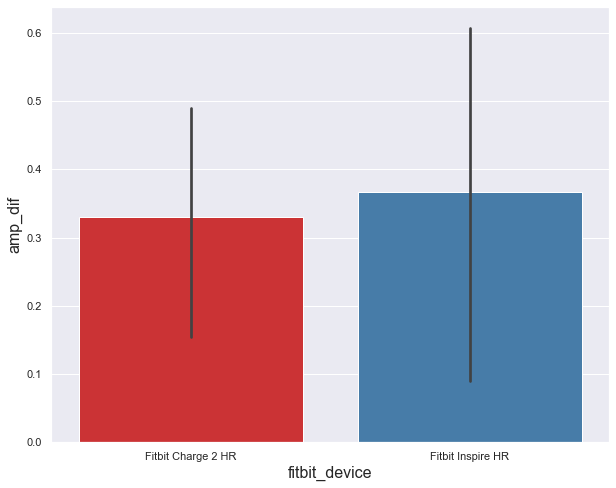

In [245]:
sns.barplot(x = 'fitbit_device', y = 'amp_dif', ci=95, data = df1, palette = 'Set1')


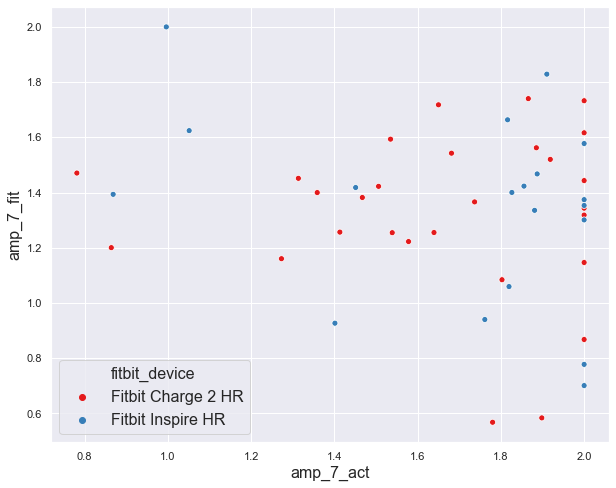

In [248]:
sns.scatterplot(x = 'amp_7_act', y = 'amp_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


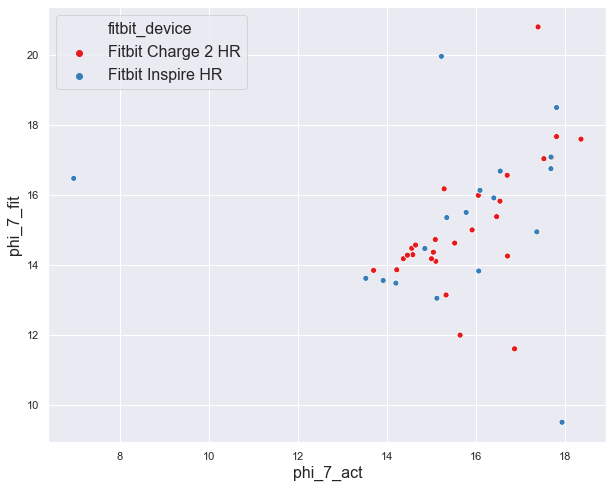

In [249]:
sns.scatterplot(x = 'phi_7_act', y = 'phi_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


### Difference in acrophase and amplitude by age group and whether or not they used Beiwe

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


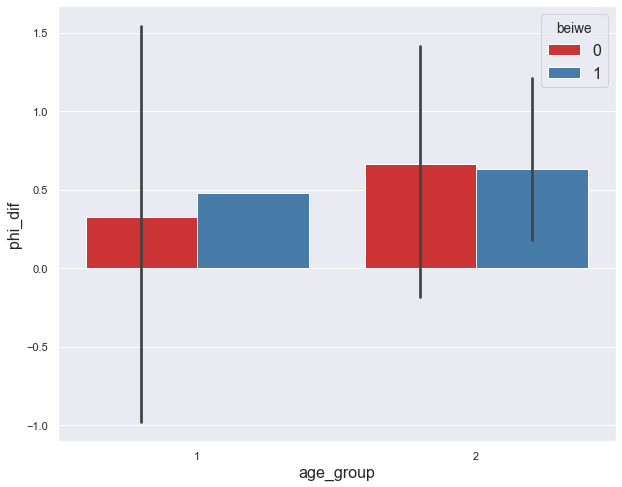

In [235]:
sns.barplot(x = 'age_group', y = 'phi_dif', hue = 'beiwe', ci=95, data = df1, palette = 'Set1')


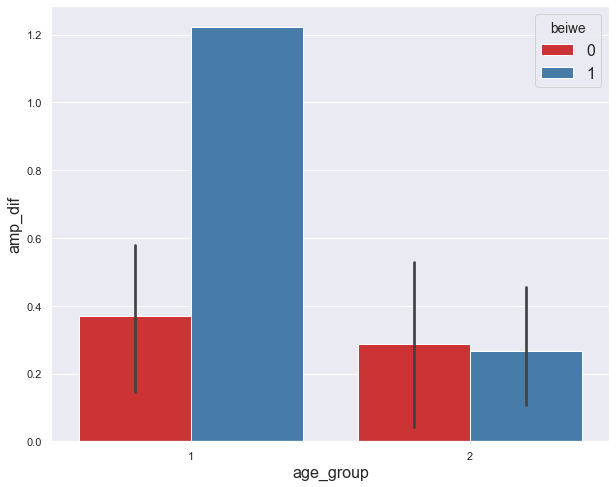

In [244]:
sns.barplot(x = 'age_group', y = 'amp_dif', hue = 'beiwe', ci=95, data = df1, palette = 'Set1')

### Difference in acrophase and amplitude by age group and fitbit device

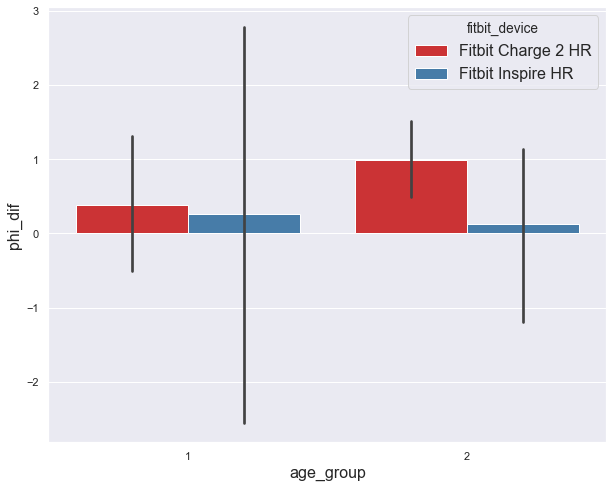

In [242]:
sns.barplot(x = 'age_group', y = 'phi_dif', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')



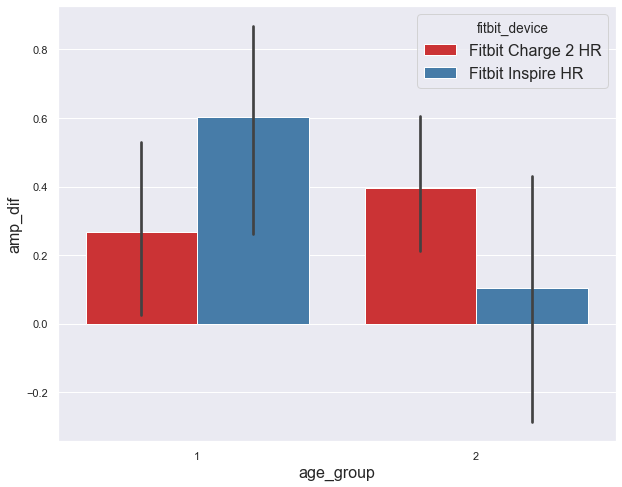

In [243]:
sns.barplot(x = 'age_group', y = 'amp_dif', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')



graph this by % missing data

### Interpolate fitbit data

In [281]:
fitInt = fit['10011']['7'].interpolate(method='linear')
fitInt

Time
2019-10-24 00:00:00    0
2019-10-24 00:01:00    0
2019-10-24 00:02:00    0
2019-10-24 00:03:00    0
2019-10-24 00:04:00    0
                      ..
2019-10-30 23:55:00    0
2019-10-30 23:56:00    0
2019-10-30 23:57:00    0
2019-10-30 23:58:00    0
2019-10-30 23:59:00    0
Freq: T, Name: Activity, Length: 10080, dtype: int64

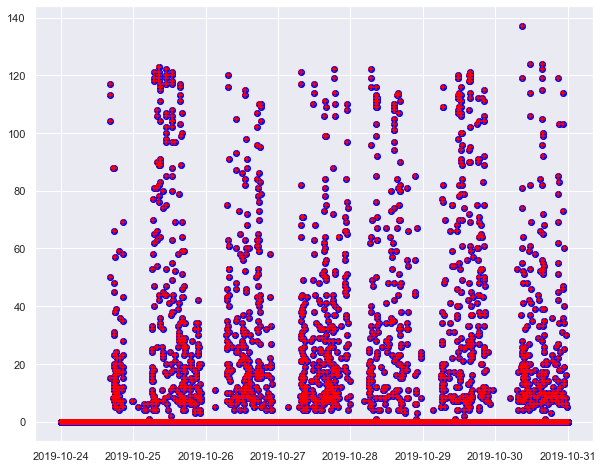

In [284]:
plt.scatter(x = fit['10011']['7'].index, y = fit['10011']['7'], color = 'blue')
plt.scatter(x = fitInt.index, y = fitInt, color = 'red', marker='+')



In [212]:
dfmelt = pd.melt(df1.reset_index(), id_vars=['subject','device'], value_vars=df1.columns[~df1.columns.str.contains('subject|device')])
dfmelt['n_days'] = dfmelt['variable'].str.split('_').str[1]
dfmelt['variable'] = dfmelt['variable'].str.split('_').str[0]
dfmelt

,subject,device,variable,value,n_days
0,10011,Actiwatch 2.0,actmin,1.175642,7
1,10011_repeat,Actiwatch 2.0,actmin,1.289564,7
2,10012,Actiwatch 2.0,actmin,1.234697,7
3,10014,Actiwatch 2.0,actmin,1.256328,7
4,10016,Actiwatch 2.0,actmin,1.625095,7
...,...,...,...,...,...
1095,20154,NaN,phi,13.400184,10
1096,20155,NaN,phi,14.568922,10
1097,20157,NaN,phi,17.306535,10
1098,20163,NaN,phi,13.621116,10


In [213]:
df2 = dfmelt.pivot_table(index=['subject', 'device', 'n_days'], 
                    columns='variable', 
                    values='value').reset_index().set_index('subject')
df2

variable,device,n_days,actmin,alpha,amp,beta,phi
subject,,,,,,,
10011,Actiwatch 2.0,10,1.363726e+00,-0.746322,1.548120,16.382556,14.705452
10011,Actiwatch 2.0,7,1.175642e+00,-0.731704,1.639313,409.696423,14.860626
10011,Fitbit Charge 2 HR,10,2.430395e-13,-0.631359,1.624958,11.522257,14.362384
10011,Fitbit Charge 2 HR,7,6.455933e-02,-0.603692,1.255278,440.486311,14.471933
10011_repeat,Actiwatch 2.0,10,1.469762e+00,-0.777402,1.437241,9.071246,15.102758
...,...,...,...,...,...,...,...
20181,Actiwatch 2.0,7,1.053967e+00,-0.615047,1.826433,11.656873,15.115342
20182,Actiwatch 2.0,10,9.838579e-01,-0.729434,1.840887,5.559503,15.244310
20182,Actiwatch 2.0,7,1.046134e+00,-0.521339,1.713977,21.296197,15.295543


[Text(0, 0.5, 'Slope'), Text(0.5, 0, 'Days of Actigraphy')]

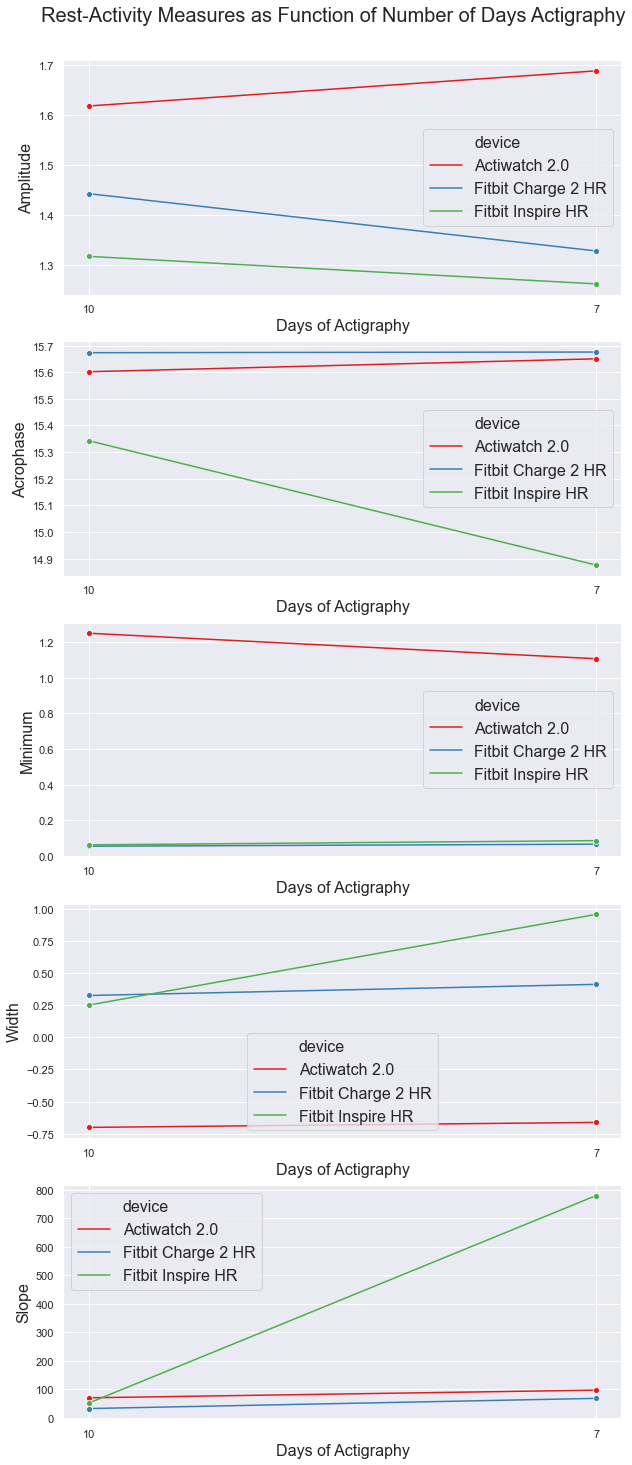

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=.91)

sns.lineplot(x = 'n_days', y = 'amp', hue = 'device', data = df2, ax = ax[0], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Amplitude')
sns.lineplot(x = 'n_days', y = 'phi', hue = 'device', data = df2, ax = ax[1], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Acrophase')
sns.lineplot(x = 'n_days', y = 'actmin', hue = 'device', data = df2, ax = ax[2], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Minimum')
sns.lineplot(x = 'n_days', y = 'alpha', hue = 'device', data = df2, ax = ax[3], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Width')
sns.lineplot(x = 'n_days', y = 'beta', hue = 'device', data = df2, ax = ax[4], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Slope')


In [ ]:
dfmelt

In [ ]:
dfmelt['variable'].str.split('_')[1][1]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=0.89)

ax[0].plot(recording_period_min, cr_act.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[0].plot(recording_period_min, cr_fit.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[0].set_title("Minimum")
ax[0].set_ylim(0,2)
ax[0].legend()

ax[1].plot(recording_period_min, cr_act.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[1].plot(recording_period_min, cr_fit.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[1].set_title("Amplitude")
ax[1].set_ylim(0,2)
ax[1].legend()

ax[2].plot(recording_period_min, cr_act.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[2].plot(recording_period_min, cr_fit.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[2].set_title("Alpha (Width)")
ax[2].legend()

ax[3].plot(recording_period_min, cr_act.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[3].plot(recording_period_min, cr_fit.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[3].set_title("Beta (Slope)")
ax[3].legend()

ax[4].plot(recording_period_min, cr_act.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[4].plot(recording_period_min, cr_fit.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[4].set_title("Phi (Acrophase)")
ax[4].legend()

ax[4].set_xlabel('Number of Days', fontsize=16)

plt.subplots_adjust(top=0.85)

